# K Nearest Neighbours

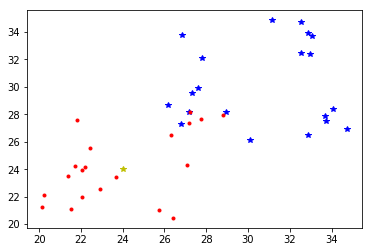

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
n = 20
np.random.seed(1237)
x1 = (np.random.rand(n, 2)*9)+26
x2 = (np.random.rand(n,2)*9) +20
plt.plot(x1[:,0],x1[:,1],'b*'); plt.plot(x2[:,0],x2[:,1],'r.'); plt.plot(24, 24, 'y*');

# KNN

In [2]:
def euclid_dist(x, y):
    tot = 0
    try:
        for i in range(len(x)):
            diff = (x[i] - y[i])**2
            tot +=diff
    except:
        tot = (x - y)**2
    return np.sqrt(tot)

def knn(k, X, y, sample):
    dists = []
    classes=[]
    for row in X:
        d = euclid_dist(row, sample)
        dists.append(d)
    inds = np.argpartition(dists, k)
    for ind in inds[:k]:
        classes.append(y[ind])
    return max(set(classes), key = classes.count)

In [3]:
def apply_knn_to_each(k, X, y, sample_array):
    res_array=[]
    for row in sample_array:
        cls = knn(k, X, y, row)
        res_array.append(cls)
    return np.array(res_array)

# Using my functions

In [4]:
X1 = np.array([(x[0], x[1],0) for x in x1]); X2 = np.array([(x[0],x[1],1) for x in x2])
X = np.concatenate([X1, X2])
X_data = X[:,:2]; y_data = X[:,2]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

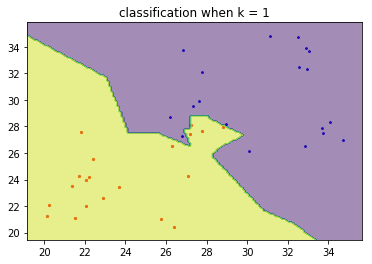

In [5]:
for k in range(1,2,2):
    plt.figure()
    Z = apply_knn_to_each(k, X_data, y_data, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(x1[:,0],x1[:,1],marker='*',c='b',s=5)
    plt.scatter(x2[:,0],x2[:,1],marker='o',c='r',s=5)
    CS = plt.contourf(xx, yy, Z, alpha = .5)
    plt.title("classification when k = %d" %k)
    f_name = "./images/knn_k%d.png"%k
    plt.savefig(f_name); plt.show()

# Using Library Function

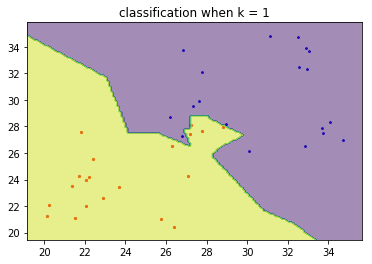

In [6]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,2,2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_data, y_data); plt.figure()
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(x1[:,0],x1[:,1],marker='*',c='b',s=5); plt.scatter(x2[:,0],x2[:,1],marker='o',c='r',s=5)
    CS = plt.contourf(xx, yy, Z, alpha = .5); plt.title("classification when k = %d" %k)
    f_name = "./images/knn_k%d.png"%k; plt.savefig(f_name); plt.show();

# Multi Class Classification

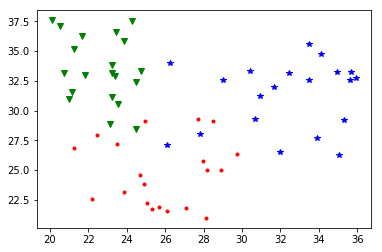

In [7]:
n = 20; np.random.seed(12345)
x1 = (np.random.rand(n, 2)*10)+26; x2 = (np.random.rand(n,2)*10) +20
x3 = (np.multiply(np.random.rand(int(n),2),[5,10]))+[20,28]
m1 = np.mean(x1, axis=0); m2 = np.mean(x2, axis=0);m3 = np.mean(x3,axis=0)
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.');plt.plot(x3[:,0],x3[:,1], 'gv')
X1 = np.array([(x[0], x[1],0) for x in x1]); X2 = np.array([(x[0],x[1],1) for x in x2]);
X3 = np.array([(x[0],x[1],2) for x in x3])
X = np.concatenate([X1, X2, X3])
X_data = X[:,:2]; y_data = X[:,2];

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Multiclass classification with equally sized classes¶

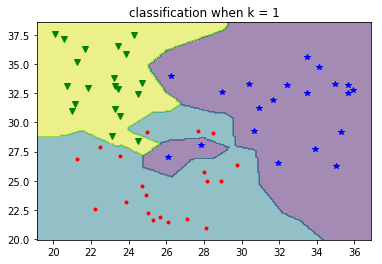

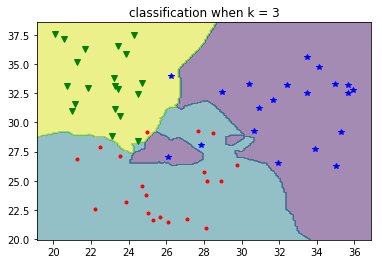

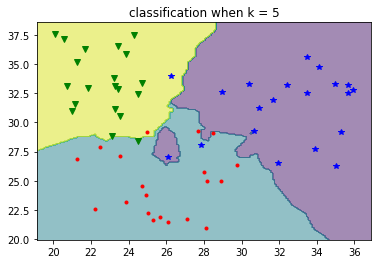

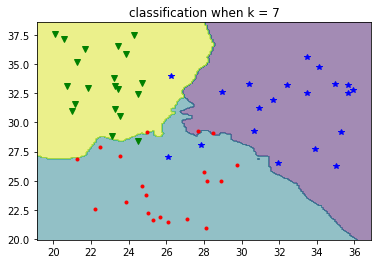

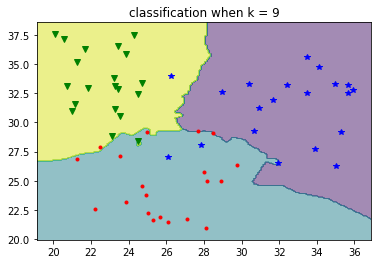

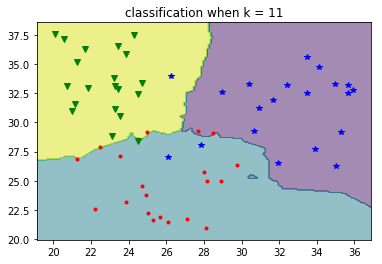

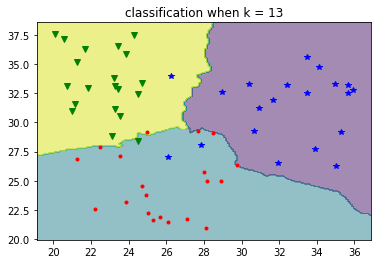

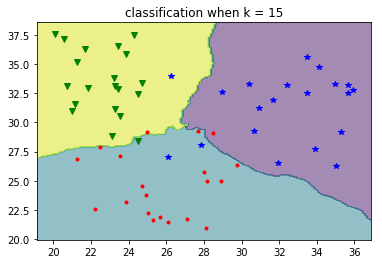

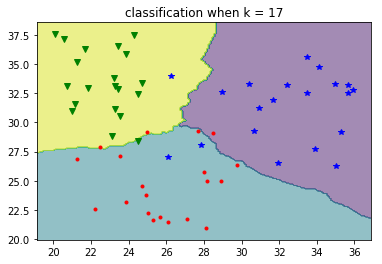

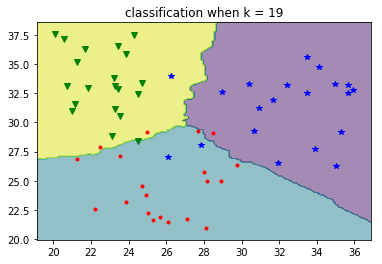

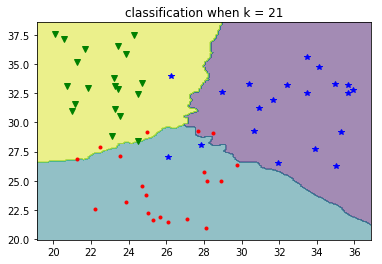

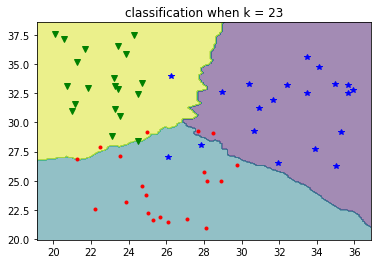

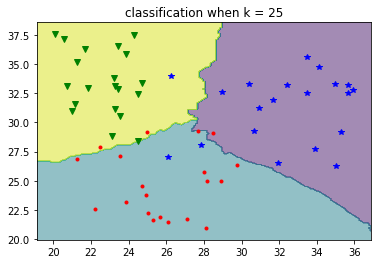

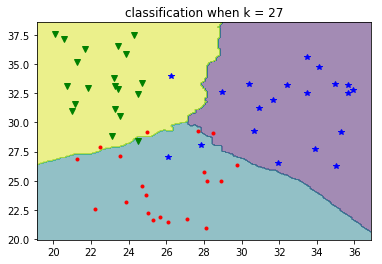

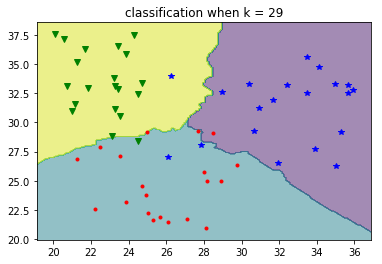

In [9]:
for k in range(1,30,2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_data, y_data)
    plt.figure()
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.');plt.plot(x3[:,0],x3[:,1], 'gv')
    CS = plt.contourf(xx, yy, Z, alpha = .5)
    plt.title("classification when k = %d" %k)
    f_name = "./images/knn_3class_k%d.png"%k
    plt.savefig(f_name)
    plt.show()

# multi class classification with unequal classes

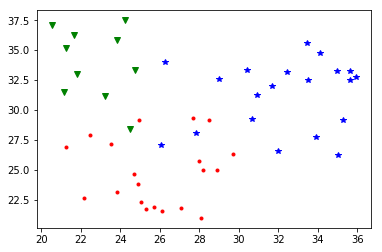

In [10]:
n = 20; np.random.seed(12345)
x1 = (np.random.rand(n, 2)*10)+26; x2 = (np.random.rand(n,2)*10) +20
x3 = (np.multiply(np.random.rand(int(n/2),2),[5,10]))+[20,28]
m1 = np.mean(x1, axis=0); m2 = np.mean(x2, axis=0);m3 = np.mean(x3,axis=0)
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.');plt.plot(x3[:,0],x3[:,1], 'gv')
X1 = np.array([(x[0], x[1],0) for x in x1]); X2 = np.array([(x[0],x[1],1) for x in x2]);
X3 = np.array([(x[0],x[1],2) for x in x3])
X = np.concatenate([X1, X2, X3])
X_data = X[:,:2]; y_data = X[:,2];

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

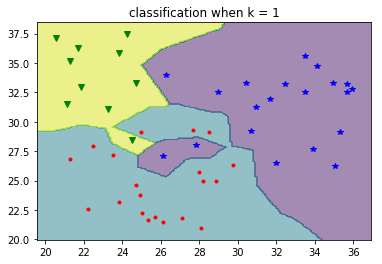

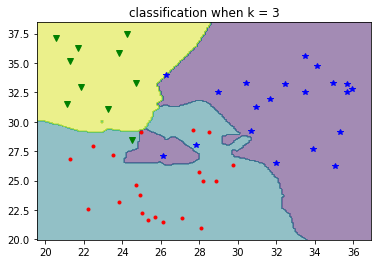

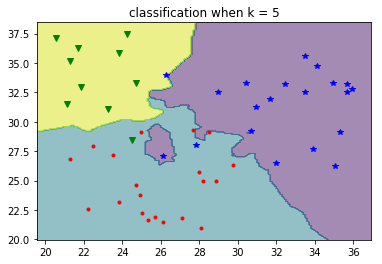

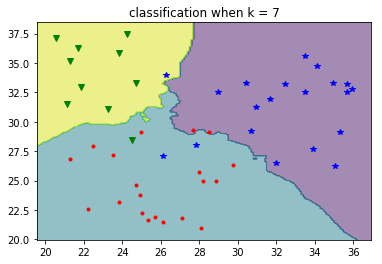

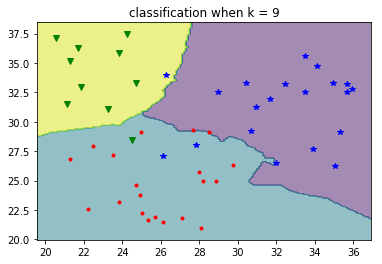

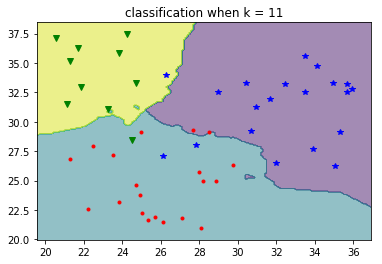

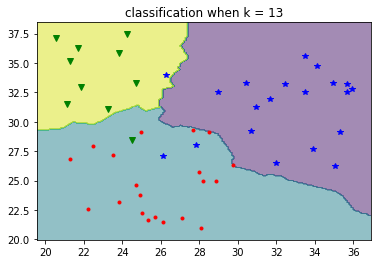

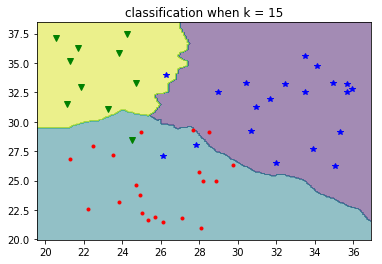

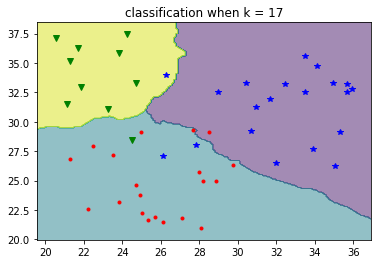

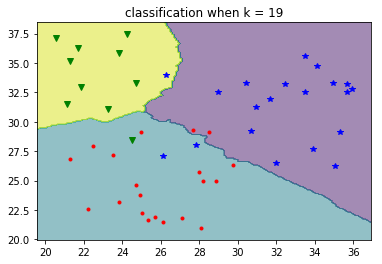

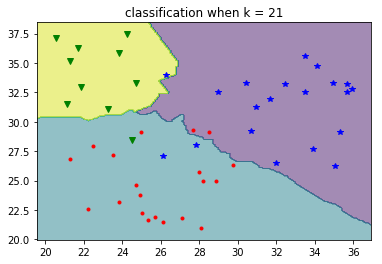

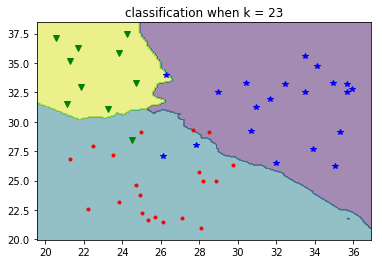

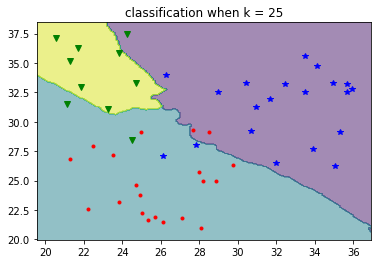

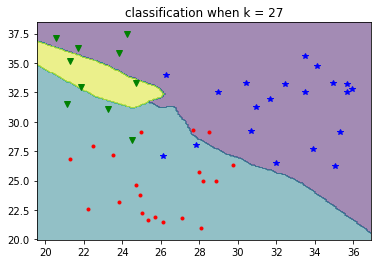

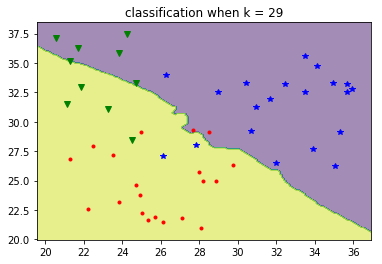

In [12]:
for k in range(1,30,2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_data, y_data)
    plt.figure()
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.');plt.plot(x3[:,0],x3[:,1], 'gv')
    CS = plt.contourf(xx, yy, Z, alpha = .5)
    plt.title("classification when k = %d" %k)
    f_name = "./images/knn_3class_uneq_k%d.png"%k
    plt.savefig(f_name)
    plt.show()

# MNIST classification with KNN

In [14]:
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
mnist = datasets.load_digits()
trainData, testData, trainLabels, testLabels = train_test_split(np.array(mnist.data), 
                                                                mnist.target, test_size=0.25, random_state=42)
trainData, valData, trainLabels, valLabels = train_test_split(trainData, trainLabels,
                                                            test_size=0.1, random_state=84)
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


In [15]:
kVals = range(1, 30, 2)
accuracies = []
for k in range(1, 30, 2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(trainData, trainLabels)
    score = neigh.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
                                                                       accuracies[i] * 100))

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data


In [16]:
neigh = KNeighborsClassifier(n_neighbors=kVals[i])
neigh.fit(trainData, trainLabels)
predictions = neigh.predict(testData)
 
from sklearn.metrics import classification_report
print(classification_report(testLabels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



I think that digit is: 6


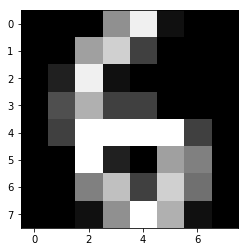

I think that digit is: 6


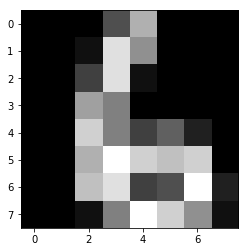

I think that digit is: 5


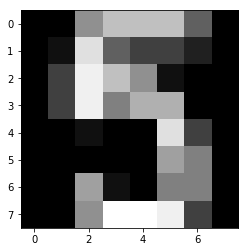

I think that digit is: 4


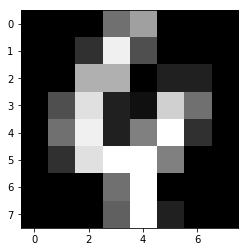

I think that digit is: 6


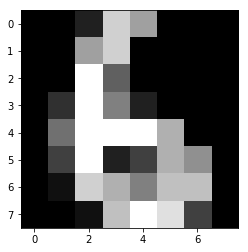

I think that digit is: 8


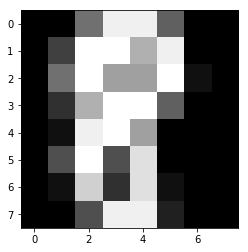

I think that digit is: 0


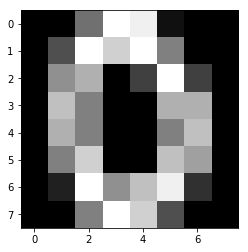

I think that digit is: 3


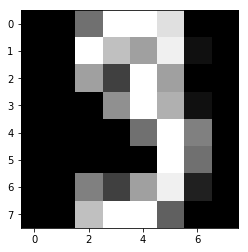

I think that digit is: 0


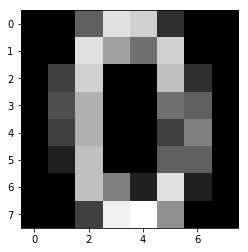

I think that digit is: 7


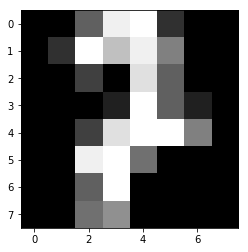

In [17]:

for i in list(map(int, np.random.randint(0, high=len(testLabels), size=(10,)))):
    plt.figure()
    image = testData[i]
    prediction = neigh.predict(image.reshape(1, -1))[0]
    print("I think that digit is: {}".format(prediction))
    im = image.reshape(8,8)
    plt.imshow(im, cmap = "gray")
    plt.show()

# KNN Regression

In [18]:
def knn_regression(k, X, y, sample):
    dists = []
    targets=[]
    for row in X:
        d = euclid_dist(row, sample)
        dists.append(d)
    inds = np.argpartition(dists, k)
    for ind in inds[:k]:
        targets.append(y[ind])
    return np.mean(targets)

def apply_knnreg_to_each(k, X, y, sample_array):
    res_array=[]
    for row in sample_array:
        cls = knn_regression(k, X, y, row)
        res_array.append(cls)
    return np.array(res_array)

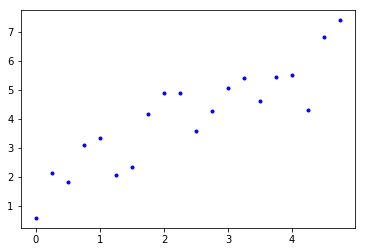

In [19]:
np.random.seed(1234)
x = np.arange(0,5,0.25)
y = np.ones(20)*x +(np.random.rand(20)*3)
plt.plot(x, y, 'b.'); plt.savefig("reg_knn")

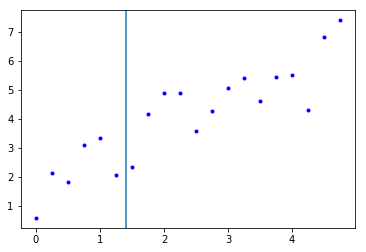

In [20]:
plt.plot(x, y, 'b.'); plt.axvline(x=1.4); plt.savefig("reg_knn_line")

# Using my KNN Regression

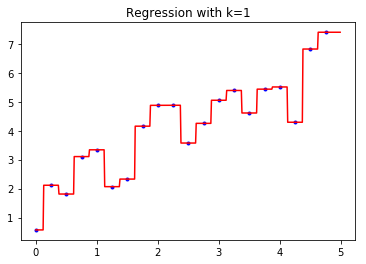

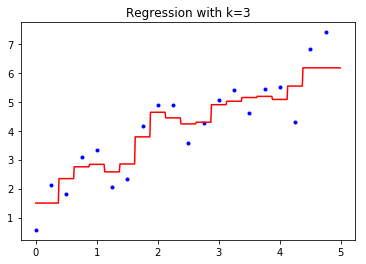

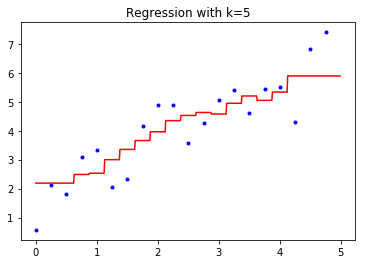

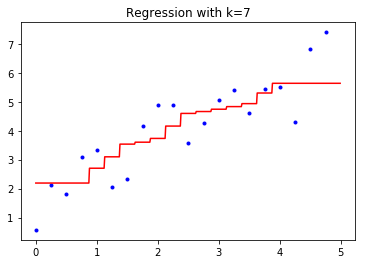

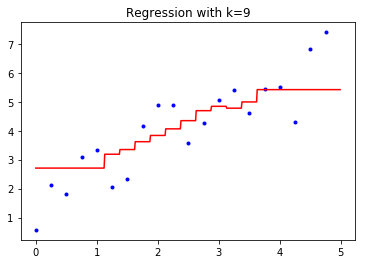

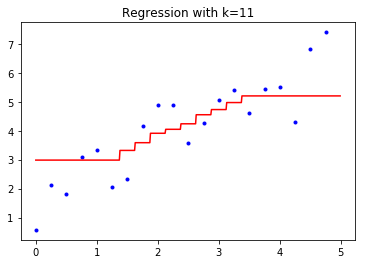

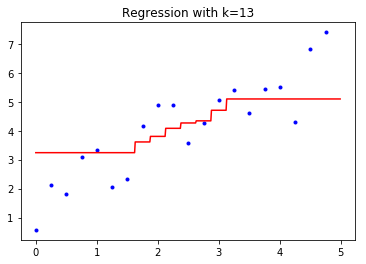

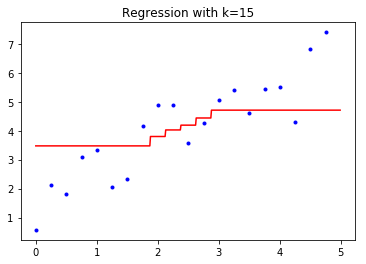

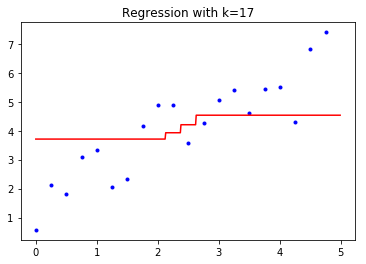

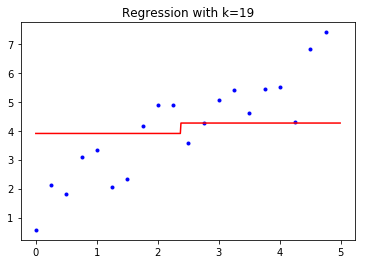

In [21]:
x_test = np.arange(0,5,0.01)
for k in range(1, 20, 2):
    plt.figure()
    y_test = apply_knnreg_to_each(k, x, y, x_test)
    plt.plot(x, y, 'b.'); plt.plot(x_test, y_test, 'r-')
    plt.title("Regression with k=%d" %k)
    fname = "./images/knn_reg_k%d" %k
    plt.savefig(fname)
    plt.show()

# Using sklearn KNN regressor

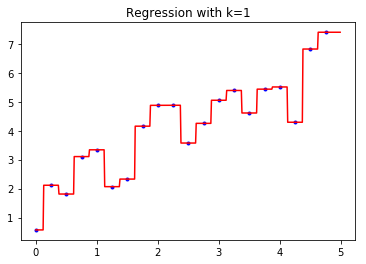

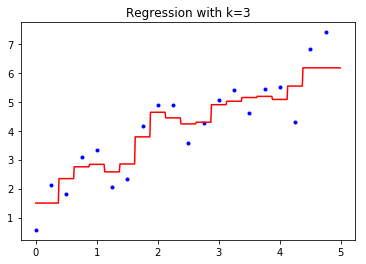

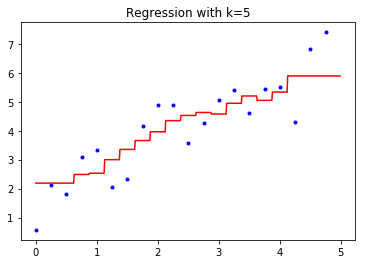

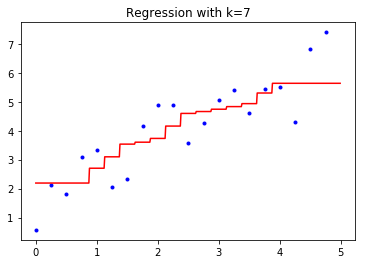

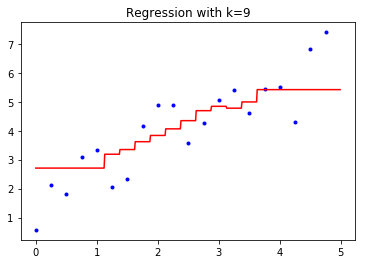

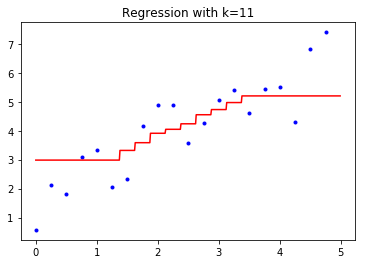

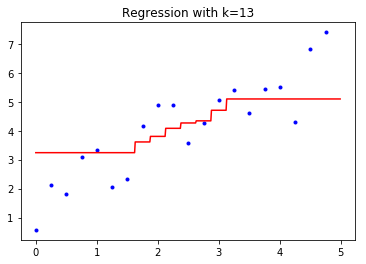

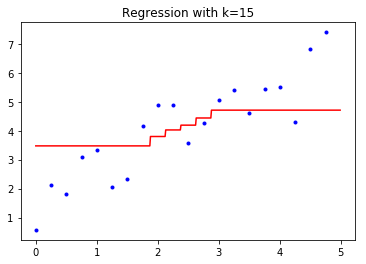

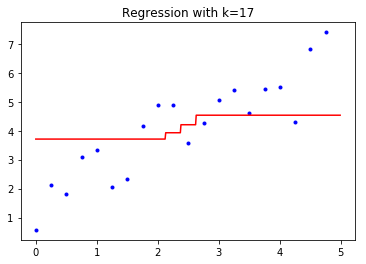

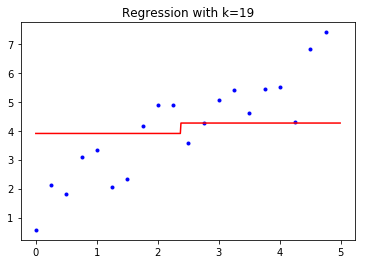

In [22]:
from sklearn.neighbors import KNeighborsRegressor
x = x.reshape(-1, 1); x_test = x_test.reshape(-1, 1)
for k in range(1, 20, 2):
    plt.figure()
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(x,y)
    y_test = neigh.predict(x_test)
    y_test = y_test.reshape(-1, 1)
    plt.plot(x, y, 'b.'); plt.plot(x_test, y_test, 'r-')
    plt.title("Regression with k=%d" %k)
    fname = "./images/knn_reg_k%d" %k
    plt.savefig(fname); plt.show()

# Measuring Error vs k

In [23]:
from sklearn.metrics import mean_squared_error

x = np.arange(0,5,0.125)
y = np.ones(40)*x +(np.random.rand(40)*3)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

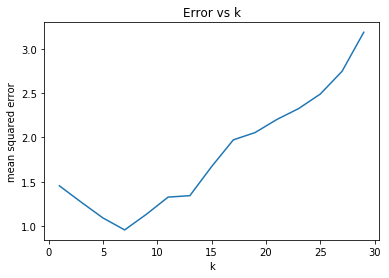

In [24]:
errs = []
k_range = range(1,30,2)
for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_est = neigh.predict(X_test)
    y_est = y_est.reshape(-1, 1)
    err = mean_squared_error(y_est, y_test)
    errs.append(err)
plt.plot(k_range, errs); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
plt.savefig("error_kreg")

# KNN regression on Height Weight Age problem

In [25]:
df = pd.read_csv("howell1.txt")#, names=["height", "weight", "age", "male"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
height    544 non-null float64
weight    544 non-null float64
age       544 non-null float64
male      544 non-null int64
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


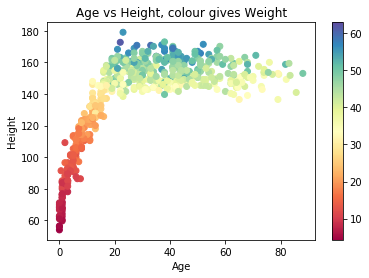

In [26]:
X = np.array(df["height"], df["weight"])
y_norm = df["weight"]
fig = plt.figure()
ax = fig.add_subplot(111)
pt = plt.scatter(df["age"],df["height"], c=y_norm, cmap=plt.cm.Spectral)
plt.colorbar(pt); plt.title("Age vs Height, colour gives Weight"); plt.xlabel("Age"); plt.ylabel("Height")
plt.savefig("./images/height_age")

In [27]:
x1 = np.array(df["age"]).reshape(-1,1); x2 =  np.array(df["height"]).reshape(-1,1)
X = np.concatenate([x1,x2], axis=1)
y = np.array(df["weight"])
print(X.shape, y.shape)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = 1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

(544, 2) (544,)


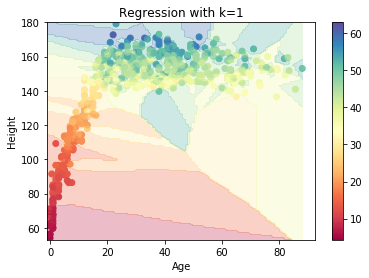

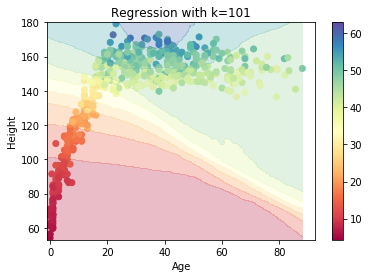

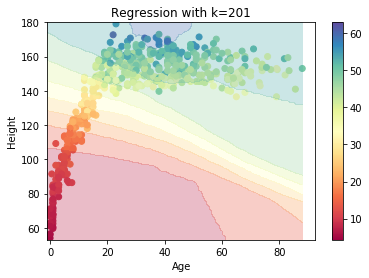

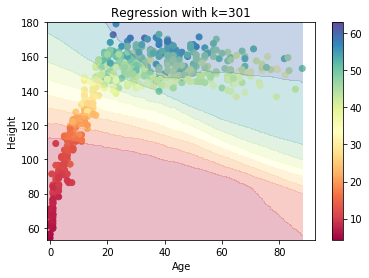

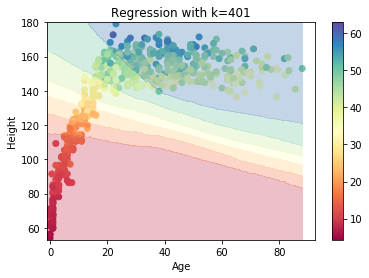

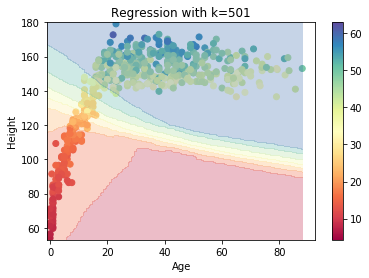

In [28]:
for k in range(1, 544, 100):
    plt.figure()
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X,y)
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pt = plt.scatter(df["age"],df["height"], c=y_norm, cmap=plt.cm.Spectral)
    CS = plt.contourf(xx, yy, Z, alpha = .3, cmap=plt.cm.Spectral)
    plt.colorbar(pt); plt.title("Age vs Height, colour gives Weight"); plt.xlabel("Age"); plt.ylabel("Height")
    plt.title("Regression with k=%d" %k)
    fname = "./images/knn_reg_hw_k%d" %k
    plt.savefig(fname)
    plt.show()

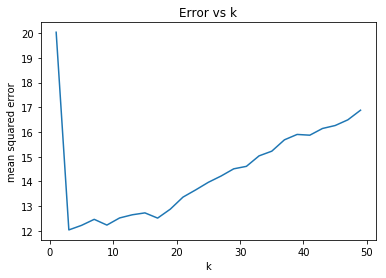

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
errs = []
k_range = range(1,50,2)
for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_est = neigh.predict(X_test)
    y_est = y_est.reshape(-1, 1)
    err = mean_squared_error(y_est, y_test)
    errs.append(err)
plt.plot(k_range, errs); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
plt.savefig("error_kreg")

# weighted KNN 

In [30]:
def inv_weight(dist):
    return 1/(1+dist)

def sub_weight(dist):
    z = np.zeros(dist.shape)
    m = 50-dist
    return np.maximum(z, m)

def gauss_weight(dist):
    return np.exp(1*-(dist**2)/2)

In [31]:
print(X.shape, y.shape)
weighs = [None, inv_weight, sub_weight, gauss_weight]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
weight_errs = []
X_train = X_train.reshape(-1, 2)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 2)
y_test = y_test.reshape(-1, 1)
print(X_test.shape, y_test.shape)

(544, 2) (544,)
(180, 2) (180, 1)


In [ ]:
weight_errs=[]
k_range = range(1,30,2)
for func in weighs:
    errs = []
    for k in k_range:
        neigh = KNeighborsRegressor(n_neighbors=k, weights=func)
        neigh.fit(X_train, y_train)
        y_est = neigh.predict(X_test)
        y_est = y_est.reshape(-1, 1)
        err = mean_squared_error(y_est, y_test)
        errs.append(err)
    weight_errs.append(errs)

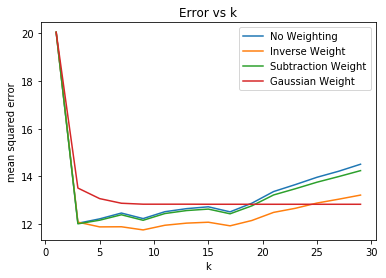

In [32]:
plt.figure(); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
labels = ["No Weighting","Inverse Weight", "Subtraction Weight", "Gaussian Weight"]
for i in range(len(weighs)):
    plt.plot(k_range, weight_errs[i], label=labels[i]); 
plt.legend()
plt.savefig("./images/error_kreg_hweigh")

In [33]:
np.random.seed(1234)
x = np.arange(0,5,0.25)
y = np.ones(20)*x +(np.random.rand(20)*3)

weighs = [None, inv_weight, sub_weight, gauss_weight]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
weight_errs = []
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
weight_errs=[]

k_range = range(1,15,2)

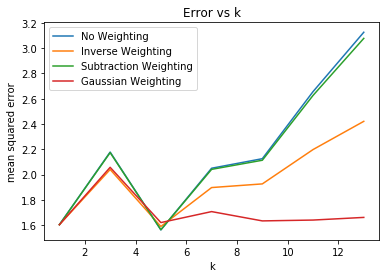

In [34]:
for func in weighs:
    errs = []
    for k in k_range:
        neigh = KNeighborsRegressor(n_neighbors=k, weights=func)
        neigh.fit(X_train, y_train)
        y_est = neigh.predict(X_test)
        y_est = y_est.reshape(-1, 1)
        errs.append(mean_squared_error(y_est, y_test))
    weight_errs.append(errs)
plt.figure(); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
labels = ["No Weighting","Inverse Weighting", "Subtraction Weighting", "Gaussian Weighting"]
for i in range(len(weighs)):
    plt.plot(k_range, weight_errs[i], label=labels[i]); 
plt.legend()
plt.savefig("./images/error_kreg_simple")

In [35]:
# Simple Regression Example

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

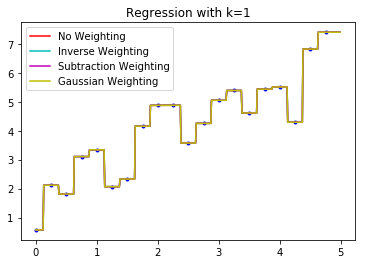

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

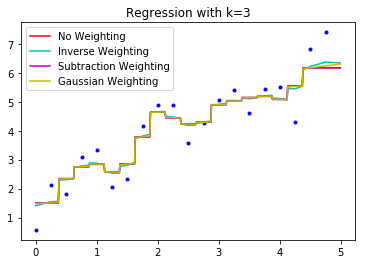

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

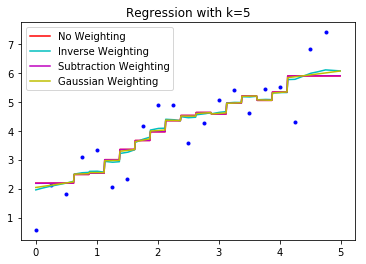

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

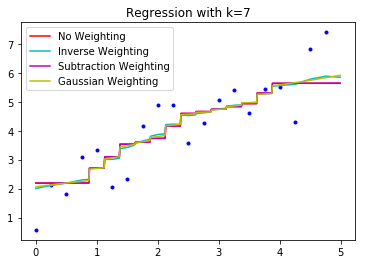

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

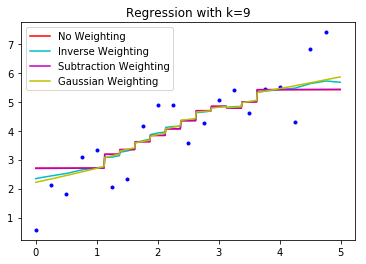

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

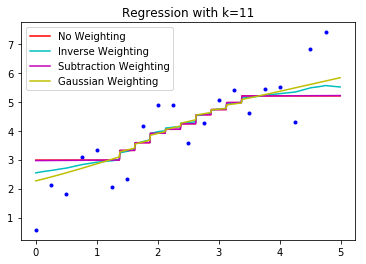

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

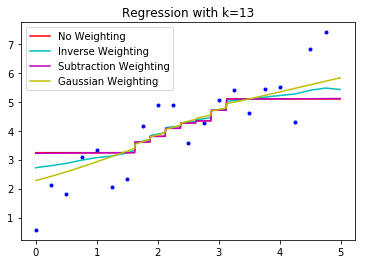

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

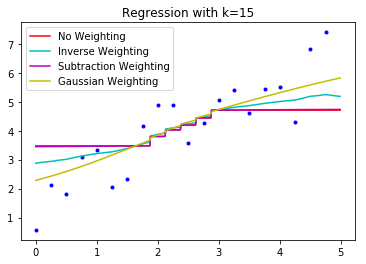

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

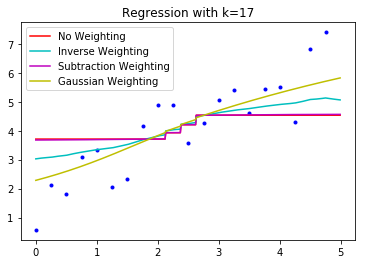

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

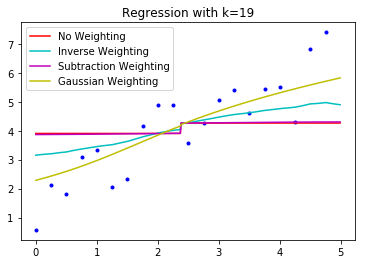

In [36]:
x_test = np.arange(0,5,0.01)
x = x.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
colours =['r-', 'c-', 'm-', 'y-']
for k in range(1, 20, 2):
    y_test_arr = []
    for func in weighs:
        plt.figure()
        neigh = KNeighborsRegressor(n_neighbors=k, weights=func)
        neigh.fit(x,y)
        y_test = neigh.predict(x_test)
        y_test = y_test.reshape(-1, 1)
        y_test_arr.append(y_test)
    plt.plot(x, y, 'b.'); 
    for i in range(len(weighs)):
        plt.plot(x_test, y_test_arr[i], colours[i], label=labels[i])
    plt.title("Regression with k=%d" %k)
    plt.legend()
    fname = "./images/knn_reg_weigh_k%d" %k
    plt.savefig(fname)
    plt.show()

# Weighting Functions

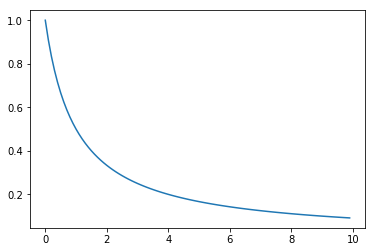

In [37]:
x = np.arange(0, 10, 0.1)
y = 1/(x+1)
plt.plot(x, y); plt.savefig("./images/inv_weight");

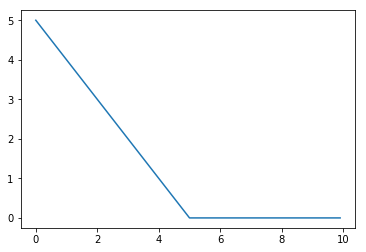

In [38]:
x_sub = 5 - x
for i in range(len(x)):
    y[i] = max(0,x_sub[i])
plt.plot(x, y); plt.savefig("./images/sub_weight")

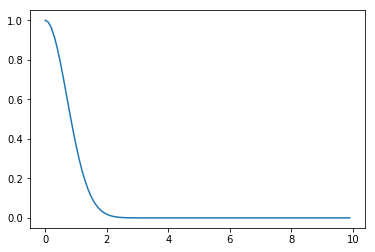

In [39]:
for i in range(len(x)):
    y[i] = np.exp(-(x[i])**2)
plt.plot(x, y); plt.savefig("./images/gauss_weight")

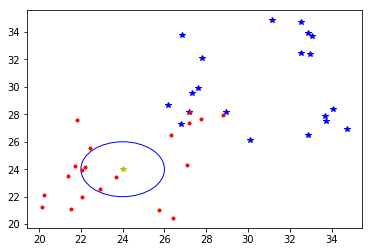

In [40]:
plt.figure()
n = 20
np.random.seed(1237)
x1 = (np.random.rand(n, 2)*9)+26
x2 = (np.random.rand(n,2)*9) +20
plt.plot(x1[:,0],x1[:,1],'b*')
plt.plot(x2[:,0],x2[:,1],'r.')
plt.plot(24, 24, 'y*')
fig = plt.gcf()
ax = fig.gca()
circle2 = plt.Circle((24, 24), 2, color='b', fill=False)
ax.add_artist(circle2)

# K-D trees

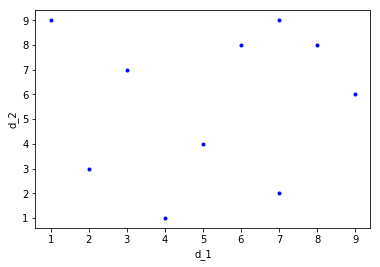

In [41]:
x = [1, 2, 4, 3, 5, 6, 7, 8, 7, 9]
y = [9,3,1,7,4,8,2,8,9,6]
X = np.array(list(zip(x,y)))
plt.plot(x,y, 'b.'); plt.xlabel("d_1"); plt.ylabel("d_2");plt.savefig("kd_tree_data"); 

# Chose dimension

In [42]:

def kd_divide(X, d):
    d = np.random.randint(0,X.shape[1])
    med = np.median(X[:,d])
    return d, med

d = 0
med = np.median(X[:,d])
print(X[:,d])

[1 2 4 3 5 6 7 8 7 9]


find median value along that dimension and divide

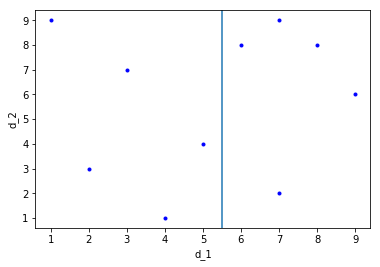

In [43]:
plt.plot(x,y, 'b.')
if d == 0:
    plt.axvline(x=med)
if d==1:
    plt.axhline(y=med)
sel1 = np.array(np.ma.where(X[:,d]<med)).flatten()
sel2 = np.array(np.ma.where(X[:,d]>=med)).flatten()
x1 = X[sel1,:]
x2 = X[sel2,:]
plt.xlabel("d_1"); plt.ylabel("d_2");

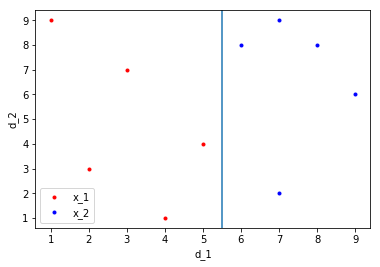

In [44]:
plt.plot(x1[:,0], x1[:,1], 'r.', label="x_1")
plt.plot(x2[:,0], x2[:,1], 'b.', label="x_2")
if d == 0:
    plt.axvline(x=med)
if d==1:
    plt.axhline(y=med)
plt.legend()
plt.xlabel("d_1"); plt.ylabel("d_2");plt.savefig("kd_split1")

# set dimension to be second dimension

Split x1 node 

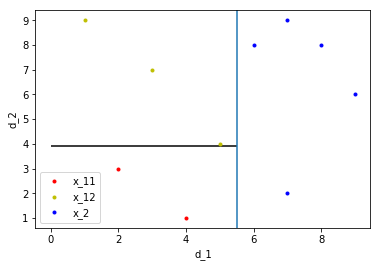

In [45]:

plt.axvline(x=med)
med2 = np.median(x1[:,(1-d)])
sel1 = np.array(np.ma.where(x1[:,(1-d)]<med2)).flatten()
sel2 = np.array(np.ma.where(x1[:,(1-d)]>=med2)).flatten()
x11 = x1[sel1,:]
x12 = x1[sel2,:]
plt.plot(x11[:,0], x11[:,1], 'r.', label="x_11")
plt.plot(x12[:,0], x12[:,1], 'y.', label="x_12")
plt.plot(x2[:,0], x2[:,1], 'b.', label="x_2"); plt.legend()

plt.hlines(xmin = 0, xmax = med, y=med2-0.1)
plt.xlabel("d_1"); plt.ylabel("d_2");plt.savefig("kd_split2")

split x2 node

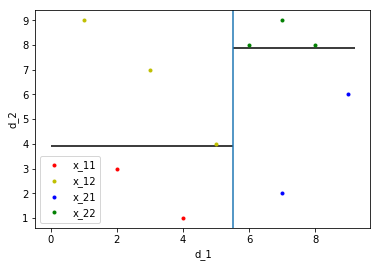

In [46]:
med3 = np.median(x2[:,(1-d)])
sel1 = np.array(np.ma.where(x2[:,(1-d)]<med3)).flatten()
sel2 = np.array(np.ma.where(x2[:,(1-d)]>=med3)).flatten()
x21 = x2[sel1,:]
x22 = x2[sel2,:]

plt.plot(x11[:,0], x11[:,1], 'r.', label="x_11")
plt.plot(x12[:,0], x12[:,1], 'y.', label="x_12")
plt.plot(x21[:,0], x21[:,1], 'b.', label="x_21")
plt.plot(x22[:,0], x22[:,1], 'g.', label="x_22")
plt.axvline(x=med)
med3 = np.median(x2[:,(1-d)])
plt.hlines(xmin = 0, xmax = med, y=med2-0.1)
plt.hlines(xmin = med, xmax = 9.2, y=med3-0.1)
plt.xlabel("d_1"); plt.ylabel("d_2"); plt.legend(); plt.savefig("kd_split3")

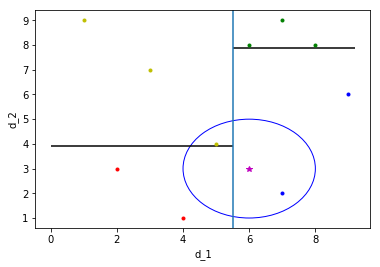

In [47]:

plt.plot(x11[:,0], x11[:,1], 'r.')
plt.plot(x12[:,0], x12[:,1], 'y.')
plt.plot(x21[:,0], x21[:,1], 'b.')
plt.plot(x22[:,0], x22[:,1], 'g.')
fig = plt.gcf()
plt.axvline(x=med)
plt.hlines(xmin = 0, xmax = med, y=med2-0.1)
plt.hlines(xmin = med, xmax = 9.2, y=med3-0.1)
ax = fig.gca()
plt.plot(6,3,'m*')
circle2 = plt.Circle((6,3), 2, color='b', fill=False)
ax.add_artist(circle2); plt.xlabel("d_1"); plt.ylabel("d_2");
plt.savefig("")

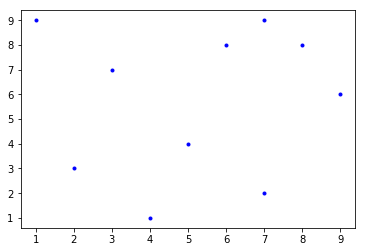

In [48]:
x = [1, 2, 4, 3, 5, 6, 7, 8, 7, 9]
y = [9,3,1,7,4,8,2,8,9,6]
X = np.array(list(zip(x,y)))
plt.plot(x,y, 'b.')

# Curse of Dimensionality


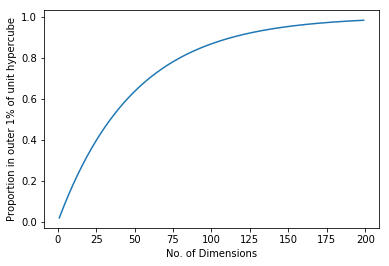

In [49]:
x = np.arange(1,200,1)
y = 1-0.98**x
plt.plot(x, y); plt.xlabel("No. of Dimensions"); plt.ylabel("Proportion in outer 1% of unit hypercube");
plt.savefig("curse_highd");

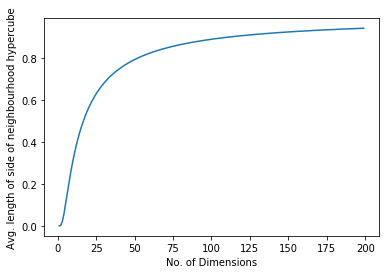

In [50]:
k=10
N = 1000000
y = (k/N)**(1/x)
plt.plot(x, y); plt.xlabel("No. of Dimensions"); plt.ylabel("Avg. length of side of neighbourhood hypercube");
plt.savefig("curse_highd_nnsize");

# dimensionality reduction

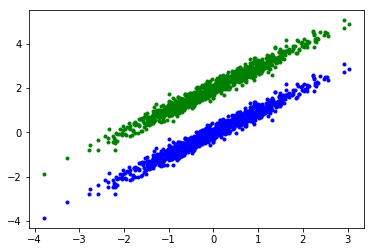

In [51]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)
Z = np.array(Y)
Z[1,:]+=2
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.plot(Z[0,:], Z[1,:], 'g.')

In [52]:
def mean_centering(X):
    mu = np.mean(X, axis=0)
    return X- np.ones((X.shape[0],X.shape[1]))*mu

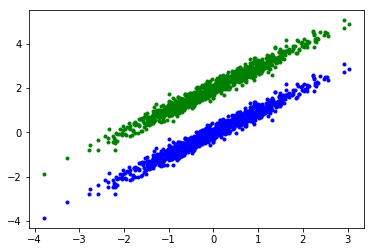

In [53]:
#Covariance
Z = np.array(Y)
Z[1,:]+=2
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.plot(Z[0,:], Z[1,:], 'g.')

cols = np.concatenate([ np.zeros(n), np.ones(n)]).astype(int)
Xf = np.concatenate([Y, Z], axis=1)
Xf = Xf.T

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
Xp = pca.fit_transform(Xf)
print(Xp)
print(Xp.shape)

[[ 0.09441464]
 [-0.77408341]
 [ 3.09691062]
 ...
 [ 0.4211714 ]
 [-0.54095052]
 [-0.77489166]]
(2000, 1)


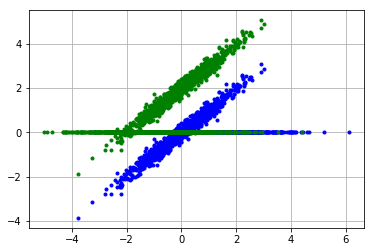

In [55]:
colour=["b.", "g."]
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.plot(Z[0,:], Z[1,:], 'g.')
for i in range(2*n):
    plt.plot(Xp[i], 0, colour[cols[i]])
plt.grid();
plt.savefig("pca_transform");

# Applying Dimensionality reduction

In [56]:
from sklearn import datasets
X, y = datasets.load_boston(return_X_y=True)

def gauss_weight(dist):
    return np.exp(1*-(dist**2)/20)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
weight_errs=[]
weighs = [None, inv_weight, gauss_weight]
k_range = range(1,30,2)
for func in weighs:
    errs = []
    for k in k_range:
        neigh = KNeighborsRegressor(n_neighbors=k, weights=func)
        neigh.fit(X_train, y_train)
        y_est = neigh.predict(X_test)
        y_est = y_est.reshape(-1, 1)
        err = mean_squared_error(y_est, y_test)
        errs.append(err)
    weight_errs.append(errs)

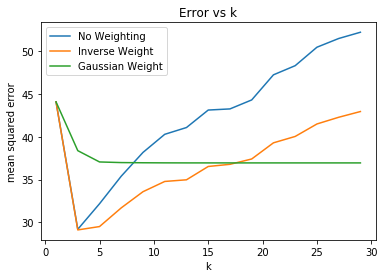

In [58]:
plt.figure(); plt.title("Error vs k"); plt.xlabel("k"); plt.ylabel("mean squared error");
labels = ["No Weighting","Inverse Weight", "Gaussian Weight"]
for i in range(len(weighs)):
    plt.plot(k_range, weight_errs[i], label=labels[i]); 
plt.legend()
plt.savefig("./images/error_kreg_hweigh");

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_red_pca = pca.fit_transform(X)

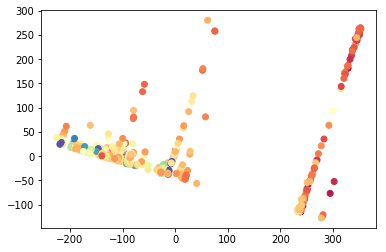

In [60]:
y_norm = y/(max(y))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_red_pca[:,0], X_red_pca[:,1], c=y_norm, cmap=plt.cm.Spectral);

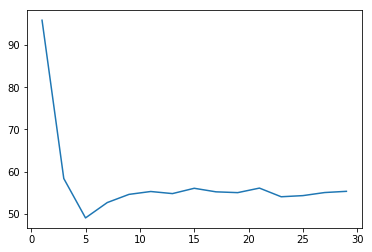

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_red_pca, y, test_size=0.33, random_state=42)
errs = []
k_range = range(1,30,2)
for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_est = neigh.predict(X_test)
    errs.append(mean_squared_error(y_est, y_test))
plt.plot(k_range, errs);

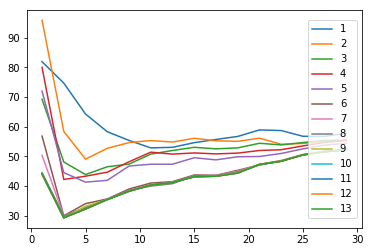

In [62]:
comp_errs=[]; k_range = range(1,30,2); plt.figure()
for n in range(1,14):
    pca = PCA(n_components=n)
    X_red_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_red_pca, y, test_size=0.33, random_state=42)
    errs = []
    for k in k_range:
        neigh = KNeighborsRegressor(n_neighbors=k)
        neigh.fit(X_train, y_train)
        y_est = neigh.predict(X_test)
        errs.append(mean_squared_error(y_est, y_test))
    plt.plot(k_range, errs, label=n)
plt.legend(loc="right");

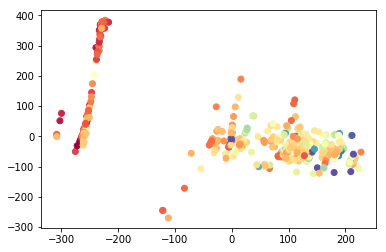

In [63]:
from sklearn.manifold import MDS
mds = MDS(n_components=2,max_iter=1000, n_init=1)
X_red_mds = mds.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_red_mds[:,0], X_red_mds[:,1], c=y_norm, cmap=plt.cm.Spectral);

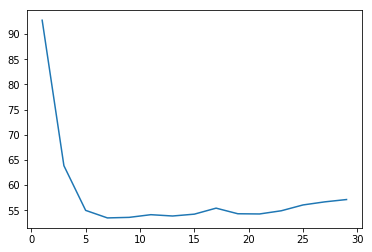

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_red_mds, y, test_size=0.33, random_state=42)
errs = []
k_range = range(1,30,2)
for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_est = neigh.predict(X_test)
    err = mean_squared_error(y_est, y_test)
    errs.append(err)
plt.plot(k_range, errs);

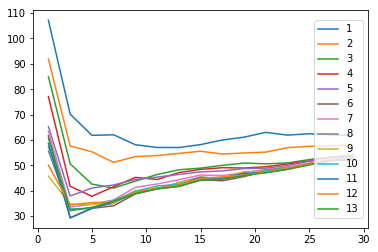

In [65]:
k_range = range(1,30,2); plt.figure()
for n in range(1,14):
    mds = MDS(n_components=n, max_iter=1000, n_init=1)
    X_mds_pca = mds.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_mds_pca, y, test_size=0.33, random_state=42)
    errs = []
    for k in k_range:
        neigh = KNeighborsRegressor(n_neighbors=k)
        neigh.fit(X_train, y_train)
        y_est = neigh.predict(X_test)
        err = mean_squared_error(y_est, y_test)
        errs.append(err)
    plt.plot(k_range, errs, label=n)
plt.legend(loc="right");

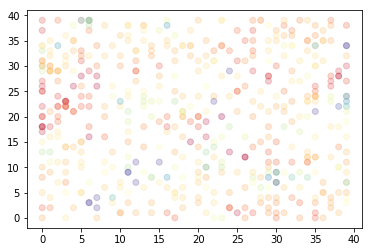

In [66]:
from minisom import MiniSom
som = MiniSom(40,40, 13, sigma=0.5, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 1000)
for i, x in enumerate(X):
    w = som.winner(x)  # getting the winner
    if i==0:
        x_red_som = w
    else:
        x_red_som = np.vstack([x_red_som, w])
plt.scatter(x_red_som[:,0], x_red_som[:,1], c=y_norm, cmap=plt.cm.Spectral, alpha=0.25);

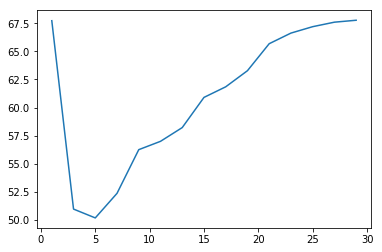

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x_red_som, y, test_size=0.33, random_state=42)
errs = []
k_range = range(1,30,2)
for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_est = neigh.predict(X_test)
    err = mean_squared_error(y_est, y_test)
    errs.append(err)
plt.plot(k_range, errs);